In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

import seaborn as sns

In [6]:
df = pd.read_csv("LOS.csv")

## 1. Exploratory Data Analysis (EDA)

In [7]:
df.head()

,eid,vdate,rcount,gender,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,...,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,discharged,facid,lengthofstay
0,1,8/29/2012,0,F,0,0,0,0,0,0,...,192.476918,12.0,1.390722,30.432418,96,6.5,4,9/1/2012,B,3
1,2,5/26/2012,5+,F,0,0,0,0,0,0,...,94.078507,8.0,0.943164,28.460516,61,6.5,1,6/2/2012,A,7
2,3,9/22/2012,1,F,0,0,0,0,0,0,...,130.530524,12.0,1.065750,28.843812,64,6.5,2,9/25/2012,B,3
3,4,8/9/2012,0,F,0,0,0,0,0,0,...,163.377028,12.0,0.906862,27.959007,76,6.5,1,8/10/2012,A,1
4,5,12/20/2012,0,F,0,0,0,1,0,1,...,94.886654,11.5,1.242854,30.258927,67,5.6,2,12/24/2012,E,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   eid                         100000 non-null  int64  
 1   vdate                       100000 non-null  object 
 2   rcount                      100000 non-null  object 
 3   gender                      100000 non-null  object 
 4   dialysisrenalendstage       100000 non-null  int64  
 5   asthma                      100000 non-null  int64  
 6   irondef                     100000 non-null  int64  
 7   pneum                       100000 non-null  int64  
 8   substancedependence         100000 non-null  int64  
 9   psychologicaldisordermajor  100000 non-null  int64  
 10  depress                     100000 non-null  int64  
 11  psychother                  100000 non-null  int64  
 12  fibrosisandother            100000 non-null  int64  
 13  malnutrition   

In [9]:
df.describe()

,eid,dialysisrenalendstage,asthma,irondef,pneum,substancedependence,psychologicaldisordermajor,depress,psychother,fibrosisandother,...,neutrophils,sodium,glucose,bloodureanitro,creatinine,bmi,pulse,respiration,secondarydiagnosisnonicd9,lengthofstay
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000
mean,50000.500000,0.036420,0.035270,0.094940,0.039450,0.063060,0.239040,0.051660,0.049390,0.004790,...,10.177455,137.891397,141.963384,14.097185,1.099350,29.805759,73.444720,6.493768,2.123310,4.00103
std,28867.657797,0.187334,0.184462,0.293134,0.194664,0.243072,0.426499,0.221341,0.216682,0.069044,...,5.353131,2.999669,29.992996,12.952454,0.200262,2.003769,11.644555,0.568473,2.050641,2.36031
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,124.912632,-1.005927,1.000000,0.219770,21.992683,21.000000,0.200000,0.000000,1.00000
25%,25000.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.700000,135.871062,121.682383,11.000000,0.964720,28.454235,66.000000,6.500000,1.000000,2.00000
50%,50000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,9.400000,137.887151,142.088545,12.000000,1.098764,29.807516,73.000000,6.500000,1.000000,4.00000
75%,75000.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.500000,139.912885,162.180996,14.000000,1.234867,31.156885,81.000000,6.500000,3.000000,6.00000
max,100000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,245.900000,151.387283,271.444277,682.500000,2.035202,38.935293,130.000000,10.000000,10.000000,17.00000


In [ ]:
df = df.drop(columns = [""])

In [ ]:
# datetime_cols = ["vdate", "discharged"] #datetime

# cat_cols = ["gender", "rcount", "facid"] #categorical columns

# bin_cols = ["dialysisrenalendstage",  #binary columns
#             "asthma",
#             "irondef",
#             "pneum",
#             "substancedependence",
#             "psychologicaldisordermajor",
#             "depress",
#             "psychother",
#             "fibrosisandother",
#             "malnutrition",
#             "hemo"]

## 2. Data vizualization

#### 2.1 Histograms for numerical values

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


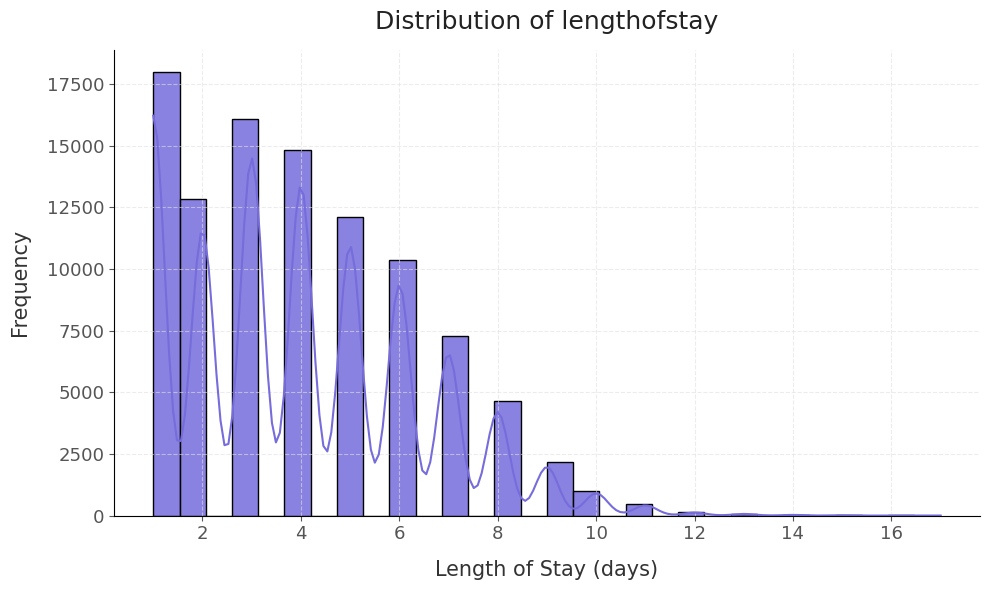

In [12]:
target_col = "lengthofstay"  # target column

plt.figure(figsize=(10, 6))
sns.histplot(df[target_col], bins=30, kde=True, color='#766CDB', edgecolor='black', alpha=0.85)

plt.title(f'Distribution of {target_col}', fontsize=18, pad=15, color='#222222')
plt.xlabel('Length of Stay (days)', fontsize=15, labelpad=12, color='#333333')
plt.ylabel('Frequency', fontsize=15, labelpad=12, color='#333333')
plt.tick_params(labelsize=13, colors='#555555')
plt.grid(True, linestyle='--', alpha=0.6, color='#E0E0E0')
sns.despine()
plt.tight_layout()
plt.show()

In [10]:
numerical_cols = ["hematocrit", #numerical columns
            "neutrophils",
            "sodium",
            "glucose",
            "bloodureanitro",
            "creatinine",
            "bmi",
            "pulse",
            "respiration"]

#### 2.3 Analyzing categorical variables

In [ ]:
categorical_cols = ['gender', 
                    'dialysisrenalendstage', 
                    'asthma', 
                    'irondef',
                    'pneum', 
                    'substancedependence', 
                    'psychologicaldisordermajor',
                    'depress']

In [15]:
# # Create count plots for categorical variables
# fig, axes = plt.subplots(2, 4, figsize=(18, 10))
# fig.subplots_adjust(hspace=0.5, wspace=0.3)
# axes = axes.flatten()

# for i, col in enumerate(categorical_cols):
#     sns.countplot(x=df[col].dropna(), ax=axes[i], palette=['#766CDB', '#DA847C', '#D9CC8B', '#7CD9A5'])
#     axes[i].set_title(f'Count of {col}', fontsize=16, pad=10, color='#222222')
#     axes[i].set_xlabel(col, fontsize=14, labelpad=10, color='#333333')
#     axes[i].set_ylabel('Count', fontsize=14, labelpad=10, color='#333333')
#     axes[i].tick_params(labelsize=12, colors='#555555')
#     axes[i].grid(True, linestyle='--', alpha=0.7, color='#E0E0E0')
#     axes[i].set_axisbelow(True)

#     # Rotate x-axis labels if needed
#     plt.setp(axes[i].get_xticklabels(), rotation=45, ha='right')

# plt.tight_layout()

# plt.show()

In [ ]:
counts = {}

# Loop through each categorical column
for col in categorical_cols:
    # Calculate the value counts for the current column
    counts[col] = df[col].value_counts().to_dict()

# Print the counts for each column
for col, count_data in counts.items():
    print(f"Counts for {col}:")
    for value, count in count_data.items():
        print(f"  {value}: {count}")
    print()

Counts for gender:
  F: 57643
  M: 42357

Counts for dialysisrenalendstage:
  0: 96358
  1: 3642

Counts for asthma:
  0: 96473
  1: 3527

Counts for irondef:
  0: 90506
  1: 9494

Counts for pneum:
  0: 96055
  1: 3945

Counts for substancedependence:
  0: 93694
  1: 6306

Counts for psychologicaldisordermajor:
  0: 76096
  1: 23904

Counts for depress:
  0: 94834
  1: 5166



#### 2.4 Relationship between variables

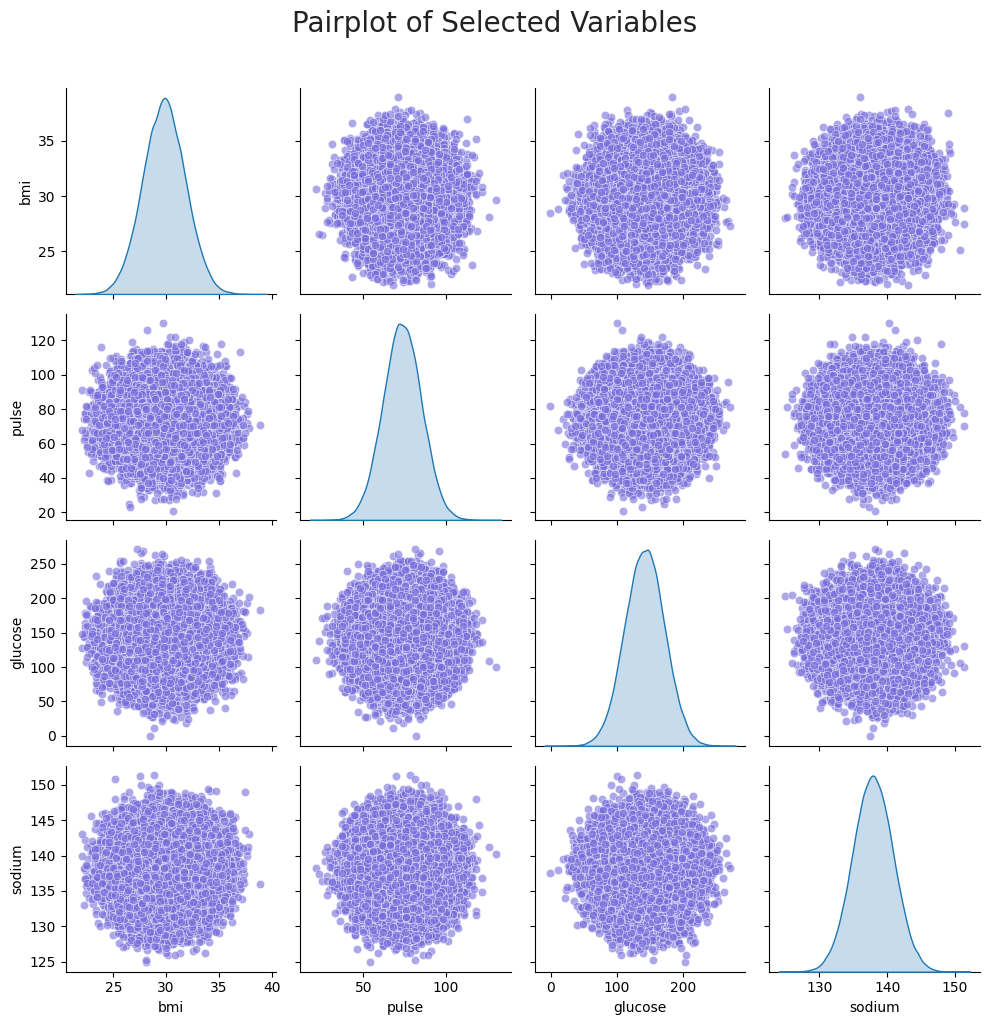

In [ ]:
# Select a subset of numerical variables for the pairplot
pairplot_cols = ['bmi', 'pulse', 'glucose', 'sodium']

sns.pairplot(df[pairplot_cols], diag_kind='kde', plot_kws={'alpha': 0.6, 'color': '#766CDB'})
plt.suptitle('Pairplot of Selected Variables', fontsize=20, y=1.02, color='#222222')
plt.tight_layout()
plt.show()

### Correlation analysis

Correlation Matrix:


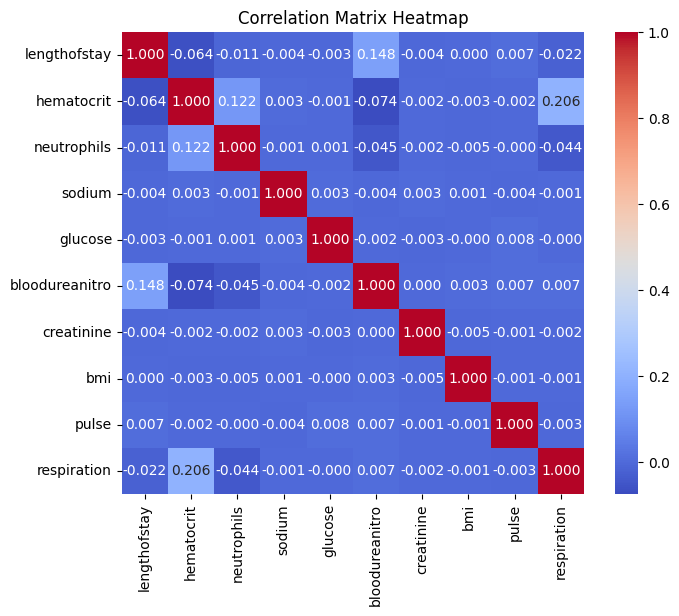

In [ ]:
correlation_matrix = df[['lengthofstay'] + numerical_cols].corr()

print("Correlation Matrix:")

# Step 3: Visualize the correlation matrix (optional)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Data preparation

In [ ]:
# Transform 'vdate' and 'discharged' to datetime and extract features
df1['vdate'] = pd.to_datetime(df1['vdate'])
df1['discharged'] = pd.to_datetime(df1['discharged'])
df1['vdate_year'] = df1['vdate'].dt.year
df1['vdate_month'] = df1['vdate'].dt.month
df1['discharged_year'] = df1['discharged'].dt.year
df1['discharged_month'] = df1['discharged'].dt.month

# Remove not important columns
df1.drop(['vdate', 'discharged'], axis=1, inplace=True)

# Encode 'gender' as numerical values
df1['gender'] = df['gender'].map({'F': 0, 'M': 1})

# Convert 'rcount' to numerical values (handle '5+' as a numeric category)
df1['rcount'] = df['rcount'].replace({'5+': 5}).astype(int)

In [17]:
# One-hot encode 'facid'
df2 = pd.get_dummies(df1, columns=['facid'], drop_first=True)


In [13]:
df1 = df.copy()

### Splitting and scaling

In [20]:
X = df2.iloc[:, :-1]
y = df2.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [21]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear models

In [22]:
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions and evaluation for Linear Regression
y_pred_linear = lr.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression MSE: {mse_linear}')

Linear Regression MSE: 0.045410270804096424


In [ ]:
# Ridge Regression Model
ridge_model = RidgeCV(cv=5)
ridge_model.fit(X_train, y_train)

# Predictions and evaluation for Ridge Regression
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print(f'Ridge Regression MSE: {mse_ridge}')

# Best alpha from Ridge
print(f'Best alpha for Ridge: {ridge_model.alpha_}')

NameError: name 'r2_score' is not defined

In [24]:
# Fit Lasso Regression Model
lasso_model = LassoCV(cv=5)
lasso_model.fit(X_train_scaled, y_train)

# Lasso Regression
y_pred_lasso = lasso_model.predict(X_test_scaled)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Lasso Regression MSE: {mse_lasso}')

print(f'Best alpha for Lasso: {lasso_model.alpha_}')

Lasso Regression MSE: 0.045511009919636254
Best alpha for Lasso: 0.0001540891912500119


In [25]:
lasso_coefficients = lasso_model.coef_
features = X_train.columns
retained_features = features[lasso_coefficients == 0]

print(f"{len(retained_features)} features removed after Lasso regression:")
print(retained_features)

12 features removed after Lasso regression:
Index(['eid', 'hematocrit', 'sodium', 'glucose', 'bloodureanitro',
       'creatinine', 'bmi', 'pulse', 'secondarydiagnosisnonicd9', 'vdate_year',
       'discharged_year', 'discharged_month'],
      dtype='object')


### Decision Tree

In [29]:
#Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

y_pred_tree = decision_tree_model.predict(X_test)

# Evaluation
mse_tree = mean_squared_error(y_test, y_pred_tree)

print(f'Decision Tree Regression MSE: {mse_tree}')

Decision Tree Regression MSE: 0.04155


In [30]:
# Assuming X_train is a DataFrame
feature_importances = decision_tree_model.feature_importances_

#Create a df
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                       Feature  Importance
8   psychologicaldisordermajor    0.613091
7          substancedependence    0.137352
10                  psychother    0.095958
29                     facid_B    0.026250
30                     facid_C    0.014784
9                      depress    0.014035
0                          eid    0.009868
17                     glucose    0.009815
20                         bmi    0.009740
31                     facid_D    0.009425
16                      sodium    0.009379
19                  creatinine    0.008820
21                       pulse    0.006627
14                  hematocrit    0.005767
15                 neutrophils    0.005205
24                lengthofstay    0.003646
18              bloodureanitro    0.002965
26                 vdate_month    0.002904
22                 respiration    0.002878
23   secondarydiagnosisnonicd9    0.002753
28            discharged_month    0.002510
5                      irondef    0.001931
1          

### Random Forest

In [31]:
# Random Forest Regressor
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_forest = random_forest_model.predict(X_test)

# Evaluate the Random Forest model
mse_forest = mean_squared_error(y_test, y_pred_forest)

print(f'Random Forest Regression MSE: {mse_forest}')

Random Forest Regression MSE: 0.019673415


In [ ]:
feature_importances_rf = random_forest_model.feature_importances_

# Create a DataFrame
importance_rf_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_rf
})

# Sort the DataFrame
importance_rf_df = importance_rf_df.sort_values(by='Importance', ascending=False)
print(importance_rf_df)

                       Feature  Importance
8   psychologicaldisordermajor    0.613289
7          substancedependence    0.136976
10                  psychother    0.096086
29                     facid_B    0.026181
30                     facid_C    0.014977
9                      depress    0.014118
16                      sodium    0.010075
17                     glucose    0.009759
0                          eid    0.009664
19                  creatinine    0.009463
31                     facid_D    0.009386
20                         bmi    0.009231
21                       pulse    0.005954
15                 neutrophils    0.005620
14                  hematocrit    0.005414
18              bloodureanitro    0.003330
22                 respiration    0.003204
23   secondarydiagnosisnonicd9    0.002700
24                lengthofstay    0.002693
28            discharged_month    0.002630
26                 vdate_month    0.002582
1                       rcount    0.001850
5          

### XGBoost

In [32]:
import xgboost as xgb

# Define the XGBoost model with default parameters
xgboost_model = xgb.XGBRegressor(random_state=42)

# Fit the model on the training data
xgboost_model.fit(X_train, y_train)

# Make predictions with the model
y_pred_xgboost = xgboost_model.predict(X_test)

# Evaluate the XGBoost model
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)

print(f'XGBoost Regression MSE: {mse_xgboost}')

XGBoost Regression MSE: 0.01939539797604084


In [ ]:
feature_importances_xgb = xgboost_model.feature_importances_

# Create a DataFrame
importance_xgb_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_xgb
})

# Sort the DataFrame by importance
importance_xgb_df = importance_xgb_df.sort_values(by='Importance', ascending=False)

print(importance_xgb_df)

                       Feature  Importance
8   psychologicaldisordermajor    0.392580
10                  psychother    0.286196
7          substancedependence    0.216131
30                     facid_C    0.031773
29                     facid_B    0.026774
31                     facid_D    0.019908
9                      depress    0.011706
4                       asthma    0.001961
5                      irondef    0.001118
6                        pneum    0.001064
13                        hemo    0.000664
24                lengthofstay    0.000613
2                       gender    0.000583
1                       rcount    0.000544
15                 neutrophils    0.000542
14                  hematocrit    0.000536
21                       pulse    0.000530
17                     glucose    0.000523
16                      sodium    0.000520
26                 vdate_month    0.000509
19                  creatinine    0.000508
11            fibrosisandother    0.000491
28         

#### Catboost

In [ ]:
from catboost import CatBoostRegressor
import lightgbm as lgb

In [ ]:
# CatBoost

catboost_model = CatBoostRegressor(verbose=0, random_state=42)
catboost_model.fit(X_train, y_train)
y_pred_catboost = catboost_model.predict(X_test)
mse_catboost = mean_squared_error(y_test, y_pred_catboost)
print(f'CatBoost Regression MSE: {mse_catboost}')


In [ ]:
feature_importances_cat = catboost_model.get_feature_importance()
importance_cat_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_cat
}).sort_values(by='Importance', ascending=False)
print(importance_cat_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_cat_df['Importance'], y=importance_cat_df['Feature'], palette='crest')
plt.title('LightGBM Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

#### LightGBM

In [ ]:
# LightGBM

lightgbm_model = lgb.LGBMRegressor(random_state=42)
lightgbm_model.fit(X_train, y_train)
y_pred_lgbm = lightgbm_model.predict(X_test)
mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
print(f'LightGBM Regression MSE: {mse_lgbm}')


In [ ]:
feature_importances_lgbm = lightgbm_model.feature_importances_
importance_lgbm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances_lgbm
}).sort_values(by='Importance', ascending=False)
print(importance_lgbm_df)

plt.figure(figsize=(10, 6))
sns.barplot(x=importance_lgbm_df['Importance'], y=importance_lgbm_df['Feature'], palette='crest')
plt.title('LightGBM Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()